In [1]:
%matplotlib inline

In [43]:
import matplotlib.pyplot as plt
import random
import math
import statistics as st

In [44]:
def flip_coin():
    return random.choice(["H","T"])

In [45]:
def flip_coin_lots(n=2**16):
    intervals = {}
    heads = 0.1
    tails = 0.1
    for i in range(1,n+1):
        flip = flip_coin()
        if flip =="H":
            heads += 1
        elif flip == "T":
            tails += 1
        else:
            raise ValueError("")
        if math.log2(i).is_integer():
            intervals[i] = {'heads':heads,'tails':tails}
    if n not in intervals:
        intervals[n] = {'heads':heads,'tails':tails}
    return intervals
        

In [46]:
data = flip_coin_lots()


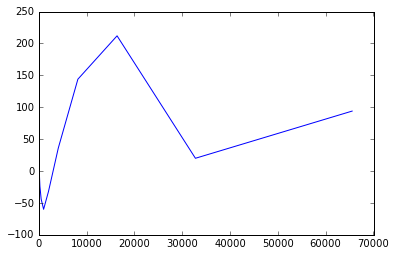

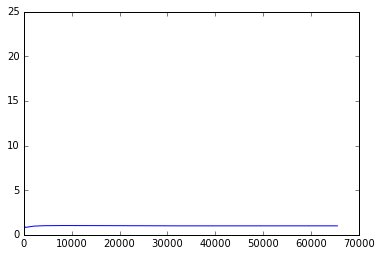

In [47]:
x_vals = list(data.keys())
x_vals.sort()

plt.plot(x_vals,[data[x]['heads'] - data[x]['tails'] for x in x_vals])
plt.show()
plt.plot(x_vals,[data[x]['heads'] / data[x]['tails'] for x in x_vals])
plt.show()

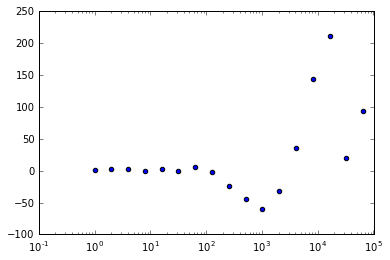

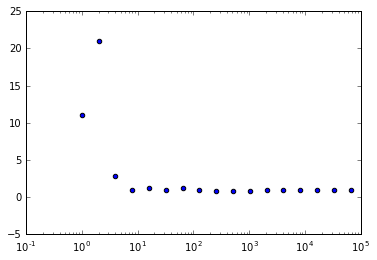

In [48]:
plt.scatter(x_vals,[data[x]['heads'] - data[x]['tails'] for x in x_vals])
plt.xscale('log')
plt.show()
plt.scatter(x_vals,[data[x]['heads'] / data[x]['tails'] for x in x_vals])
plt.xscale('log')
plt.show()

In [55]:
repetition_data = []
for i in range(20):
    repetition_data.append(flip_coin_lots())
print(repetition_data[3])

{512: {'heads': 260.1, 'tails': 252.1}, 1: {'heads': 0.1, 'tails': 1.1}, 2: {'heads': 1.1, 'tails': 1.1}, 4096: {'heads': 1995.1, 'tails': 2101.1}, 4: {'heads': 2.1, 'tails': 2.1}, 1024: {'heads': 515.1, 'tails': 509.1}, 32: {'heads': 12.1, 'tails': 20.1}, 8: {'heads': 5.1, 'tails': 3.1}, 64: {'heads': 30.1, 'tails': 34.1}, 128: {'heads': 62.1, 'tails': 66.1}, 256: {'heads': 122.1, 'tails': 134.1}, 16384: {'heads': 8228.1, 'tails': 8156.1}, 16: {'heads': 5.1, 'tails': 11.1}, 8192: {'heads': 4069.1, 'tails': 4123.1}, 32768: {'heads': 16421.1, 'tails': 16347.1}, 65536: {'heads': 32701.1, 'tails': 32835.1}, 2048: {'heads': 1009.1, 'tails': 1039.1}}


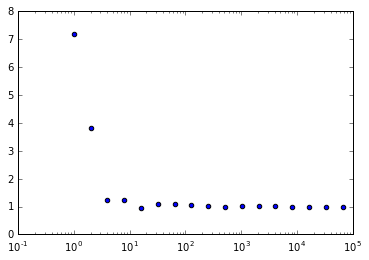

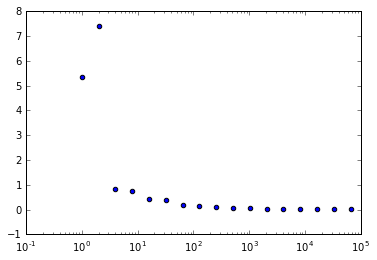

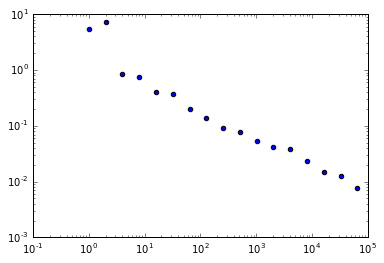

[5.338478017413741, 7.418893509455609, 0.8518491073129406, 0.7416136917566323, 0.4127816415883468, 0.37476034148789733, 0.2008247400046224, 0.13918250164042287, 0.09326548113344418, 0.0788028129282473, 0.05356648547890286, 0.042324259474062376, 0.038259373298493354, 0.02305587711257172, 0.015109571358759098, 0.012568043460829311, 0.0076165049008384365]


In [76]:

plt.scatter(x_vals,[st.mean([y[x]['heads']/y[x]['tails'] for y in repetition_data]) for x in x_vals])
plt.xscale('log')
plt.show()
plt.scatter(x_vals,[st.stdev([y[x]['heads']/y[x]['tails'] for y in repetition_data]) for x in x_vals])
plt.xscale('log')
plt.show()
plt.scatter(x_vals,[st.stdev([y[x]['heads']/y[x]['tails'] for y in repetition_data]) for x in x_vals])
plt.xscale('log')
plt.ylim(.001,10)
plt.yscale('log')
plt.show()

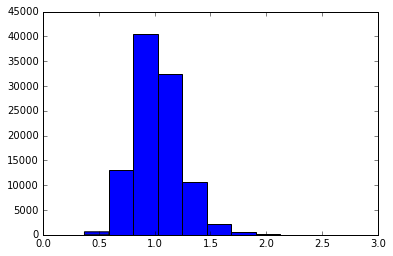

In [80]:
hundred_flips = []
for i in range(100000):
    temp_data = flip_coin_lots(100)
    hundred_flips.append(temp_data[100]['heads']/temp_data[100]['tails'])
plt.hist(hundred_flips)
plt.show()